### <i> Personalized E-Commerce Recommendations: Leveraging Machine Learning for Customer Experience Optimization</i>
### <i> Import Lirary Files </i>

In [148]:
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')


### <i> Load The Dataset </i>

In [149]:
df = pd.read_csv("customer_data_collection.csv")
df

,Customer_ID,Age,Gender,Location,Browsing_History,Purchase_History,Customer_Segment,Avg_Order_Value,Holiday,Season,Unnamed: 10
0,C1000,28,Female,Chennai,"['Books', 'Fashion']","['Biography', 'Jeans']",New Visitor,4806.99,No,Winter,NaN
1,C1001,27,Male,Delhi,"['Books', 'Fitness', 'Fashion']","['Biography', 'Resistance Bands', 'T-shirt']",Occasional Shopper,795.03,Yes,Autumn,NaN
2,C1002,34,Other,Chennai,['Electronics'],['Smartphone'],Occasional Shopper,1742.45,Yes,Summer,NaN
3,C1003,23,Male,Bangalore,['Home Decor'],['Wall Art'],Frequent Buyer,2023.16,No,Autumn,NaN
4,C1004,24,Other,Kolkata,"['Fashion', 'Home Decor']","['Shoes', 'Lamp']",Frequent Buyer,794.76,No,Winter,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,C10995,19,Other,Mumbai,"['Home Decor', 'Fashion']","['Curtains', 'Shoes']",New Visitor,4730.58,Yes,Summer,NaN
9996,C10996,34,Other,Delhi,['Beauty'],['Lipstick'],New Visitor,1488.50,No,Autumn,NaN
9997,C10997,59,Other,Delhi,"['Electronics', 'Beauty']","['Headphones', 'Perfume']",New Visitor,1504.53,Yes,Winter,NaN
9998,C10998,39,Other,Delhi,"['Books', 'Fitness']","['Fiction', 'Treadmill']",Occasional Shopper,698.43,No,Autumn,NaN


### <i> Dataset Overview </i>

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       10000 non-null  object 
 1   Age               10000 non-null  int64  
 2   Gender            10000 non-null  object 
 3   Location          10000 non-null  object 
 4   Browsing_History  10000 non-null  object 
 5   Purchase_History  10000 non-null  object 
 6   Customer_Segment  10000 non-null  object 
 7   Avg_Order_Value   10000 non-null  float64
 8   Holiday           10000 non-null  object 
 9   Season            10000 non-null  object 
 10  Unnamed: 10       0 non-null      float64
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [151]:
df.describe()

,Age,Avg_Order_Value,Unnamed: 10
count,10000.000000,10000.000000,0.0
mean,39.156000,2752.037933,NaN
std,12.372759,1295.957573,NaN
min,18.000000,500.690000,NaN
25%,29.000000,1635.797500,NaN
50%,39.000000,2740.020000,NaN
75%,50.000000,3879.345000,NaN
max,60.000000,4999.310000,NaN


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Aesthetic settings
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Drop empty/irrelevant column
df.drop(columns=["Unnamed: 10"], inplace=True)

# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Optional: Fill or drop NA if found
# df.dropna(inplace=True)

Missing values per column:
 Customer_ID         0
Age                 0
Gender              0
Location            0
Browsing_History    0
Purchase_History    0
Customer_Segment    0
Avg_Order_Value     0
Holiday             0
Season              0
dtype: int64


### <i> Data Visulizations And Analysis Of Customer Data </i>

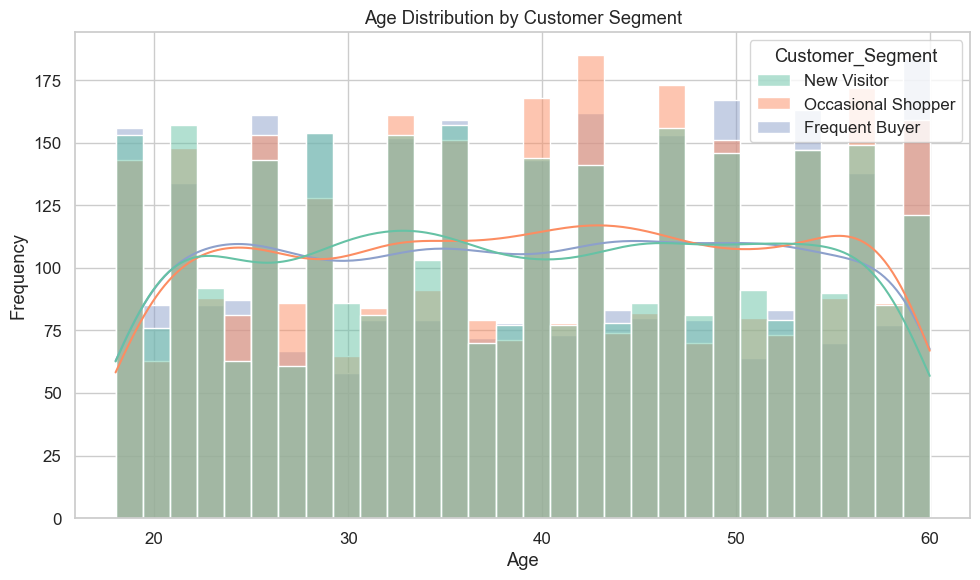

In [153]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Customer_Segment', kde=True, bins=30, palette='Set2')
plt.title("Age Distribution by Customer Segment")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [154]:
gender_counts = df['Gender'].value_counts()
fig = px.pie(values=gender_counts.values, names=gender_counts.index, title="Gender Distribution", hole=0.4)
fig.update_traces(textinfo='percent+label')
fig.show()


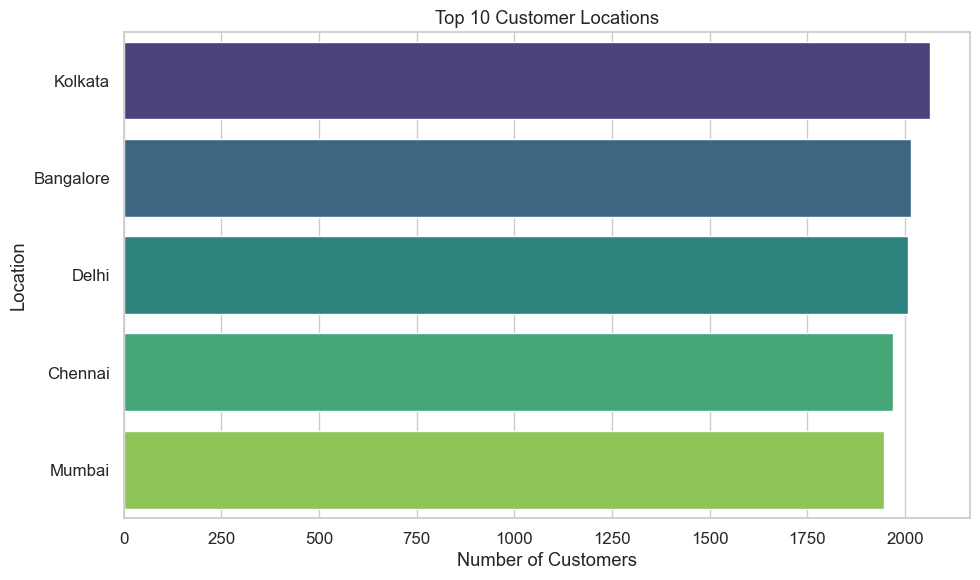

In [155]:
location_counts = df['Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette="viridis")
plt.title("Top 10 Customer Locations")
plt.xlabel("Number of Customers")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


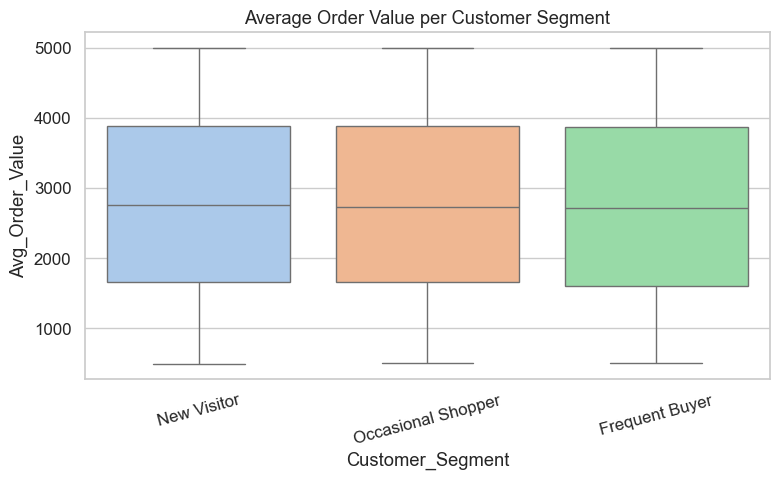

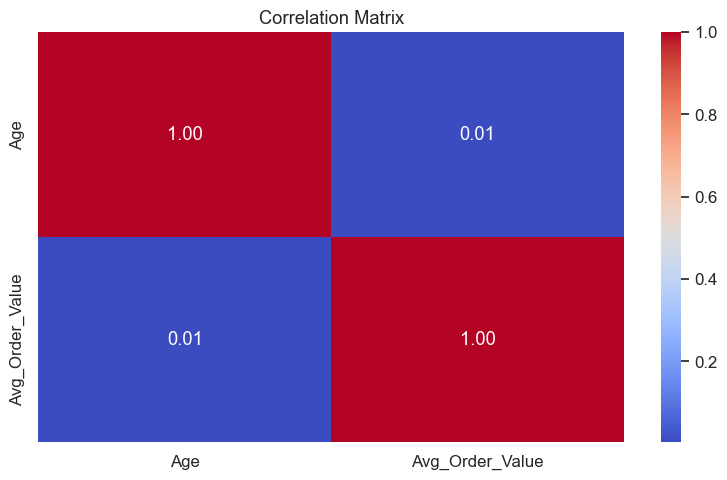

In [156]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Customer_Segment', y='Avg_Order_Value', data=df, palette='pastel')
plt.title("Average Order Value per Customer Segment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.heatmap(df[['Age', 'Avg_Order_Value']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


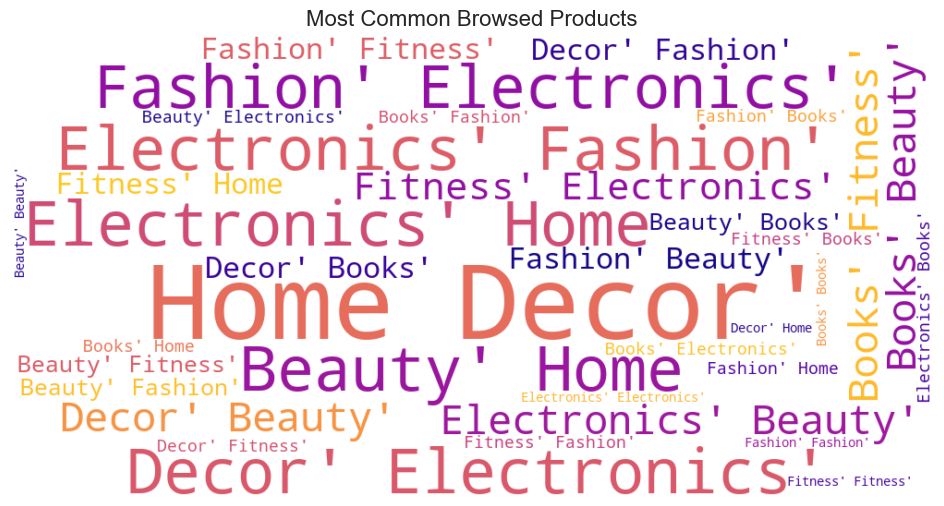

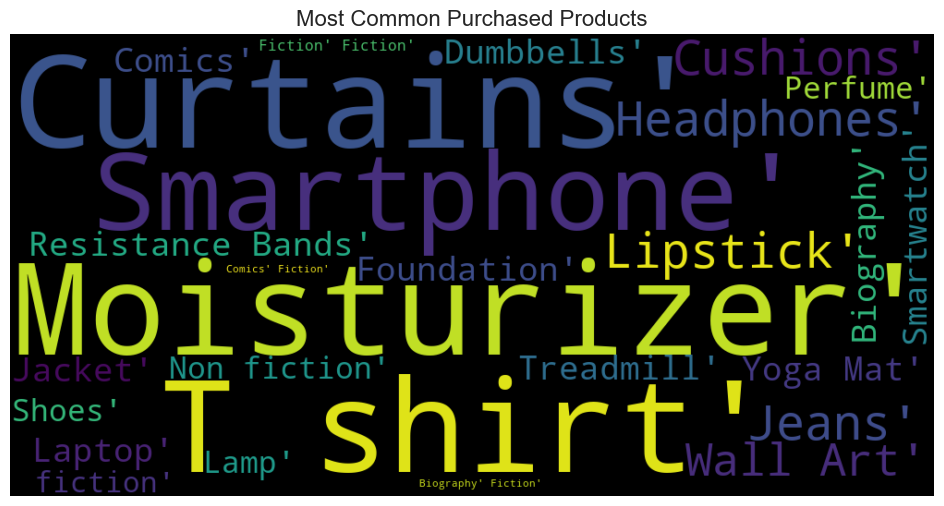

In [157]:
text = " ".join(df['Browsing_History'].dropna().values)
wc = WordCloud(width=1000, height=500, background_color='white', colormap='plasma').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Browsed Products", fontsize=16)
plt.show()


text = " ".join(df['Purchase_History'].dropna().values)
wc = WordCloud(width=1000, height=500, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Purchased Products", fontsize=16)
plt.show()


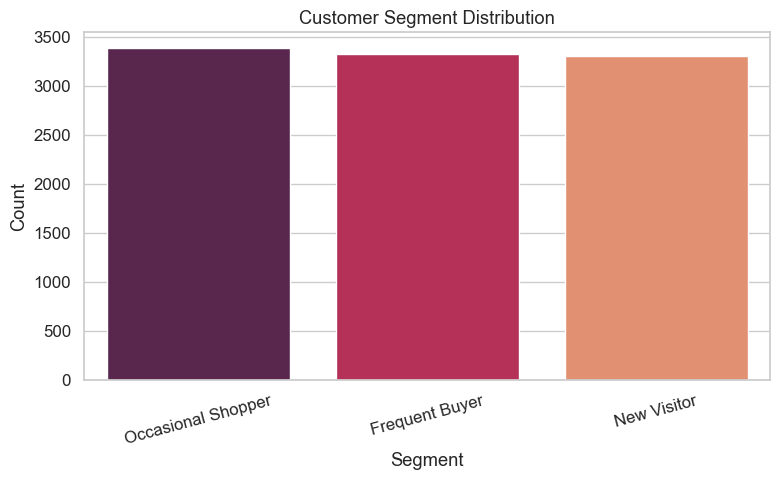

In [158]:
segment_counts = df['Customer_Segment'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='rocket')
plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


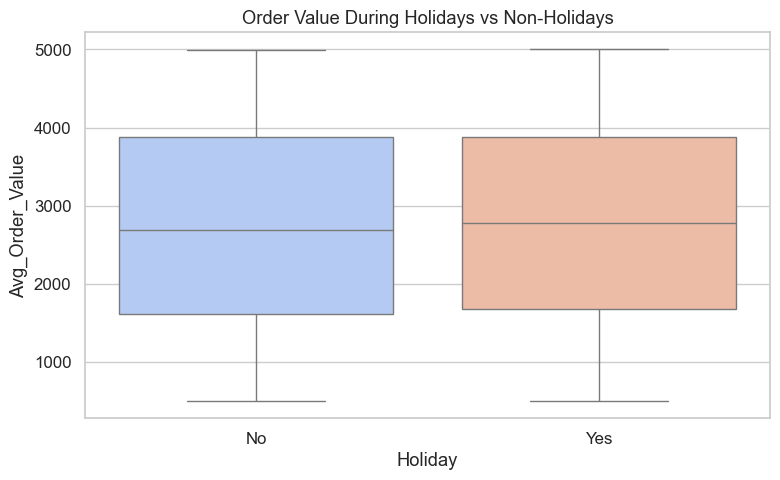

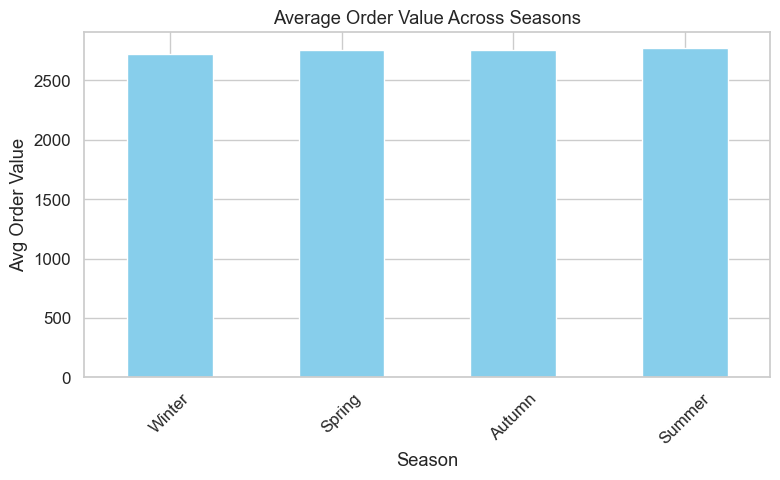

In [159]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Holiday', y='Avg_Order_Value', data=df, palette='coolwarm')
plt.title("Order Value During Holidays vs Non-Holidays")
plt.tight_layout()
plt.show()




seasonal_avg = df.groupby("Season")["Avg_Order_Value"].mean().sort_values()
plt.figure(figsize=(8, 5))
seasonal_avg.plot(kind='bar', color='skyblue')
plt.title("Average Order Value Across Seasons")
plt.ylabel("Avg Order Value")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [160]:
print("Average Order Value:", df['Avg_Order_Value'].mean())
print("Median Age:", df['Age'].median())
print("Top Customer Segment:", df['Customer_Segment'].value_counts().idxmax())
print("Top Browsing Product Sample:", df['Browsing_History'].mode()[0])
print("Top Purchased Product Sample:", df['Purchase_History'].mode()[0])


Average Order Value: 2752.037933
Median Age: 39.0
Top Customer Segment: Occasional Shopper
Top Browsing Product Sample: ['Electronics']
Top Purchased Product Sample: ['Headphones']


### <i> Load The Dataset </i>


In [161]:
df_1 = pd.read_csv("product_recommendation_data.csv")
df_1

,Product_ID,Category,Subcategory,Price,Brand,Average_Rating_of_Similar_Products,Product_Rating,Customer_Review_Sentiment_Score,Holiday,Season,Geographical_Location,Similar_Product_List,Probability_of_Recommendation,Unnamed: 13,Unnamed: 14
0,P2000,Fashion,Jeans,1713,Brand B,4.2,2.3,0.26,No,Summer,Canada,"['Jeans', 'Shoes']",0.91,NaN,NaN
1,P2001,Beauty,Lipstick,1232,Brand C,4.7,2.1,0.21,Yes,Winter,India,"['Moisturizer', 'Lipstick', 'Lipstick']",0.26,NaN,NaN
2,P2002,Electronics,Laptop,4833,Brand B,3.5,2.4,0.74,Yes,Spring,Canada,"['Headphones', 'Headphones', 'Smartphone']",0.60,NaN,NaN
3,P2003,Books,Comics,4902,Brand D,3.4,4.2,0.80,No,Winter,Germany,"['Biography', 'Non-fiction', 'Comics']",0.36,NaN,NaN
4,P2004,Home Decor,Cushions,856,Brand C,3.2,3.3,0.08,Yes,Summer,USA,['Lamp'],0.37,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,P11995,Beauty,Perfume,3184,Brand C,4.6,4.2,0.23,No,Summer,Germany,['Lipstick'],0.90,NaN,NaN
9996,P11996,Beauty,Moisturizer,4207,Brand D,4.2,3.6,0.55,Yes,Autumn,UK,"['Moisturizer', 'Lipstick']",0.22,NaN,NaN
9997,P11997,Fitness,Dumbbells,961,Brand A,2.7,3.0,0.32,Yes,Spring,India,"['Treadmill', 'Treadmill', 'Treadmill']",0.84,NaN,NaN
9998,P11998,Home Decor,Lamp,4973,Brand D,3.5,2.2,0.17,Yes,Summer,India,"['Curtains', 'Lamp', 'Lamp']",0.54,NaN,NaN


### <i> Dataset Overview </i>

In [162]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Product_ID                          10000 non-null  object 
 1   Category                            10000 non-null  object 
 2   Subcategory                         10000 non-null  object 
 3   Price                               10000 non-null  int64  
 4   Brand                               10000 non-null  object 
 5   Average_Rating_of_Similar_Products  10000 non-null  float64
 6   Product_Rating                      10000 non-null  float64
 7   Customer_Review_Sentiment_Score     10000 non-null  float64
 8   Holiday                             10000 non-null  object 
 9   Season                              10000 non-null  object 
 10  Geographical_Location               10000 non-null  object 
 11  Similar_Product_List                10000 

In [163]:
df_1.describe()

,Price,Average_Rating_of_Similar_Products,Product_Rating,Customer_Review_Sentiment_Score,Probability_of_Recommendation,Unnamed: 13,Unnamed: 14
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,0.0,0.0
mean,2552.36510,3.51216,3.502610,0.498616,0.551110,NaN,NaN
std,1413.52875,0.87081,0.872801,0.289370,0.260091,NaN,NaN
min,100.00000,2.00000,2.000000,0.000000,0.100000,NaN,NaN
25%,1325.00000,2.80000,2.700000,0.250000,0.330000,NaN,NaN
50%,2585.00000,3.50000,3.500000,0.490000,0.550000,NaN,NaN
75%,3755.00000,4.30000,4.300000,0.750000,0.780000,NaN,NaN
max,5000.00000,5.00000,5.000000,1.000000,1.000000,NaN,NaN


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Set visual style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Drop irrelevant columns
df_1.drop(columns=["Unnamed: 13", "Unnamed: 14"], inplace=True)

# Quick overview
print(df_1.info())
print("\nMissing values:\n", df_1.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Product_ID                          10000 non-null  object 
 1   Category                            10000 non-null  object 
 2   Subcategory                         10000 non-null  object 
 3   Price                               10000 non-null  int64  
 4   Brand                               10000 non-null  object 
 5   Average_Rating_of_Similar_Products  10000 non-null  float64
 6   Product_Rating                      10000 non-null  float64
 7   Customer_Review_Sentiment_Score     10000 non-null  float64
 8   Holiday                             10000 non-null  object 
 9   Season                              10000 non-null  object 
 10  Geographical_Location               10000 non-null  object 
 11  Similar_Product_List                10000 

### <i> Dataset Visulization And Analysis </i>

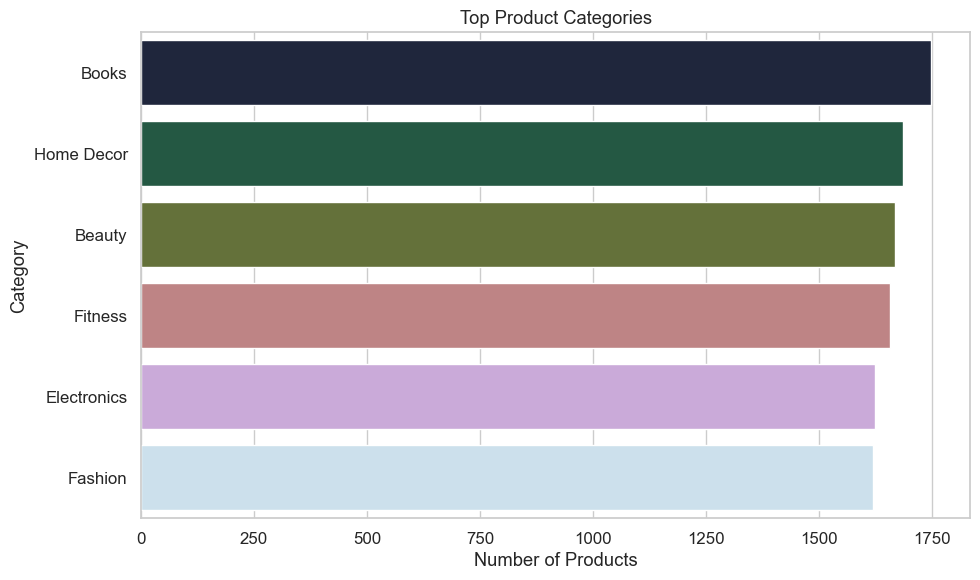

In [165]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, y='Category', order=df_1['Category'].value_counts().index, palette='cubehelix')
plt.title("Top Product Categories")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


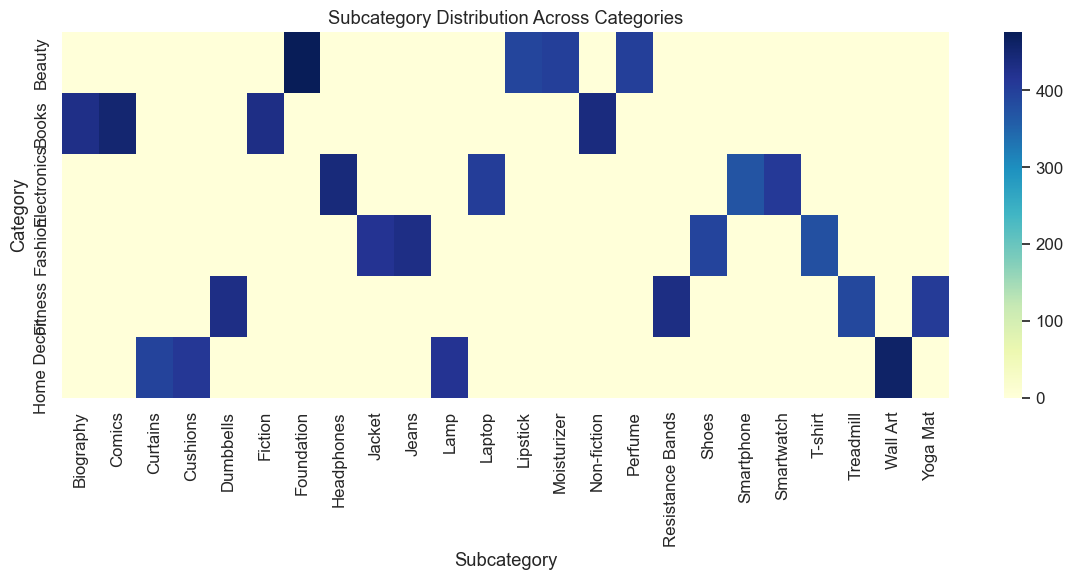

In [166]:
subcategory_ct = pd.crosstab(df_1['Category'], df_1['Subcategory'])
plt.figure(figsize=(12, 6))
sns.heatmap(subcategory_ct, cmap='YlGnBu', annot=False)
plt.title("Subcategory Distribution Across Categories")
plt.tight_layout()
plt.show()


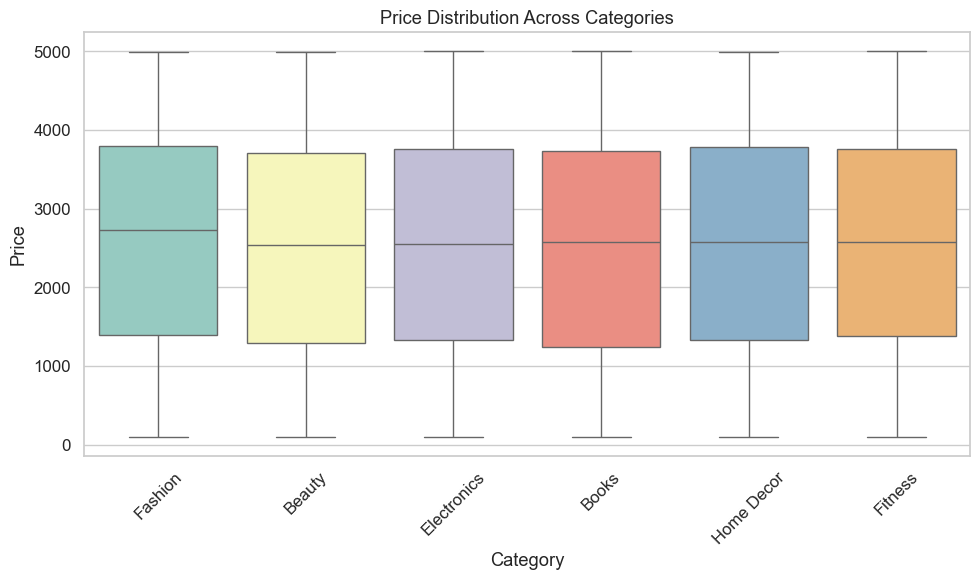

In [167]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1, x='Category', y='Price', palette='Set3')
plt.title("Price Distribution Across Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


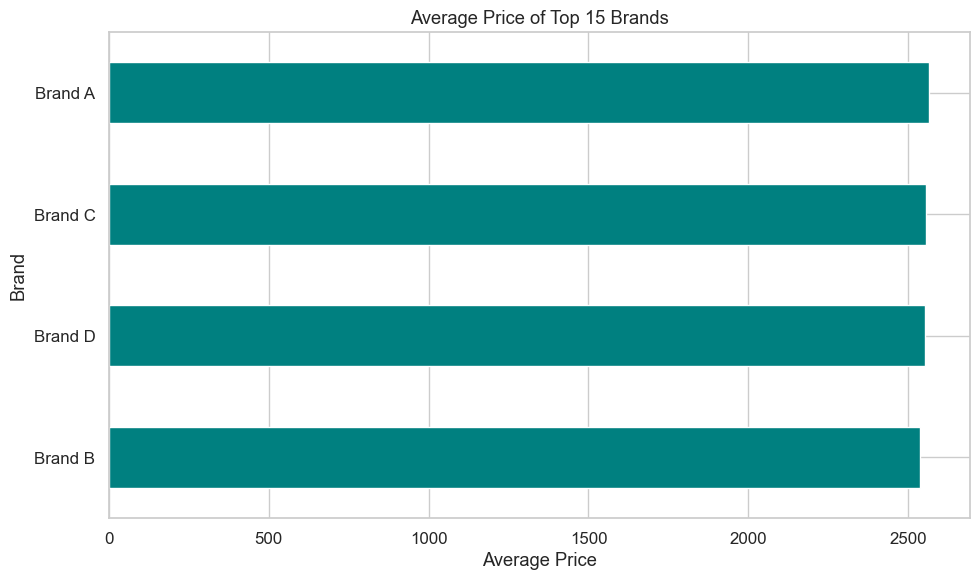

In [168]:
top_brands = df_1['Brand'].value_counts().head(15).index
avg_price = df_1[df_1['Brand'].isin(top_brands)].groupby('Brand')['Price'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_price.plot(kind='barh', color='teal')
plt.title("Average Price of Top 15 Brands")
plt.xlabel("Average Price")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()


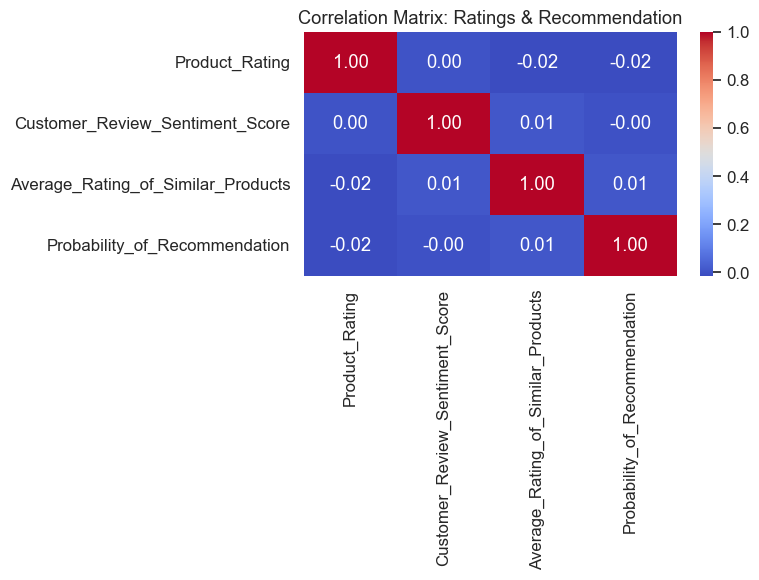

In [169]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_1[['Product_Rating', 'Customer_Review_Sentiment_Score', 
                  'Average_Rating_of_Similar_Products', 
                  'Probability_of_Recommendation']].corr(), 
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: Ratings & Recommendation")
plt.tight_layout()
plt.show()


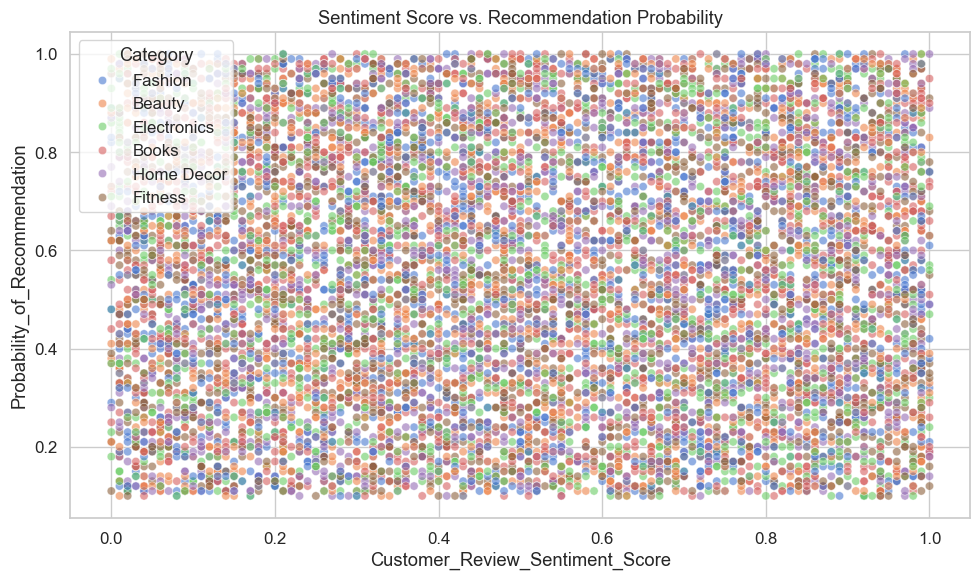

In [170]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_1, x='Customer_Review_Sentiment_Score', y='Probability_of_Recommendation', hue='Category', alpha=0.6)
plt.title("Sentiment Score vs. Recommendation Probability")
plt.tight_layout()
plt.show()


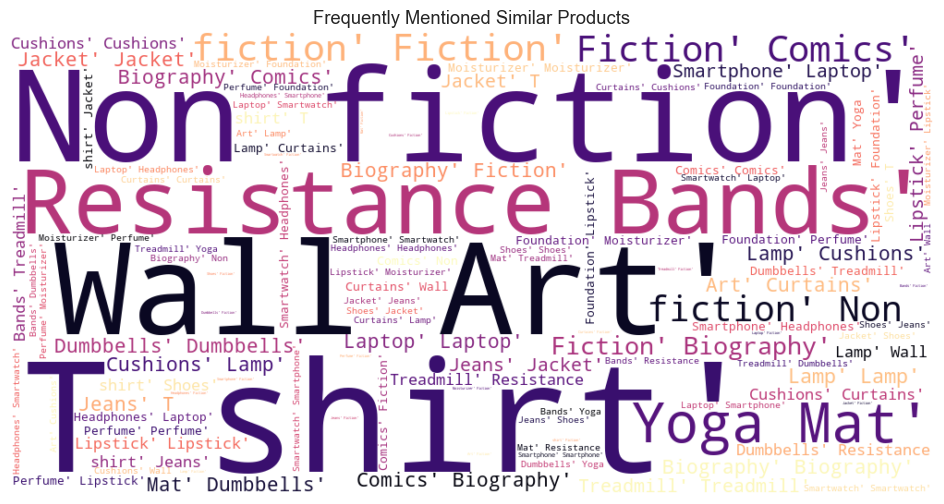

In [171]:
text = " ".join(df_1['Similar_Product_List'].dropna().values)
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='magma').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Frequently Mentioned Similar Products")
plt.show()


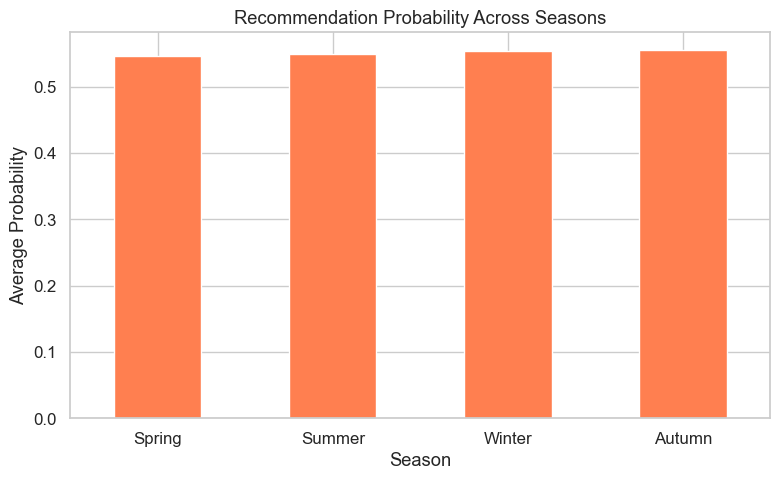

In [172]:
seasonal_avg = df_1.groupby('Season')['Probability_of_Recommendation'].mean().sort_values()
plt.figure(figsize=(8, 5))
seasonal_avg.plot(kind='bar', color='coral')
plt.title("Recommendation Probability Across Seasons")
plt.ylabel("Average Probability")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


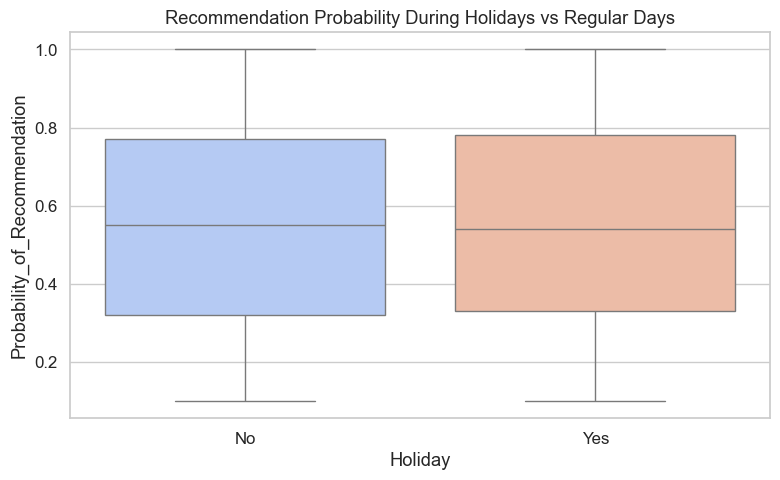

In [173]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_1, x='Holiday', y='Probability_of_Recommendation', palette='coolwarm')
plt.title("Recommendation Probability During Holidays vs Regular Days")
plt.tight_layout()
plt.show()


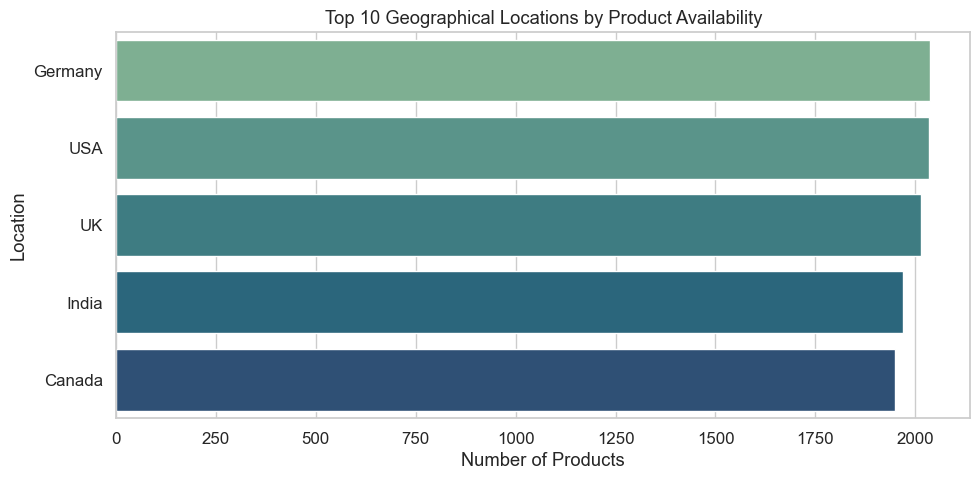

In [174]:
top_locations = df_1['Geographical_Location'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_locations.index, x=top_locations.values, palette="crest")
plt.title("Top 10 Geographical Locations by Product Availability")
plt.xlabel("Number of Products")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


In [175]:
print("\n--- KPI Summary ---")
print("Highest Rated Product:", df_1.loc[df_1['Product_Rating'].idxmax(), 'Product_ID'])
print("Most Recommended Product:", df_1.loc[df_1['Probability_of_Recommendation'].idxmax(), 'Product_ID'])
print("Top Brand by Product Count:", df_1['Brand'].value_counts().idxmax())
print("Average Sentiment Score:", round(df_1['Customer_Review_Sentiment_Score'].mean(), 2))
print("Average Product Rating:", round(df_1['Product_Rating'].mean(), 2))



--- KPI Summary ---
Highest Rated Product: P2018
Most Recommended Product: P2231
Top Brand by Product Count: Brand C
Average Sentiment Score: 0.5
Average Product Rating: 3.5


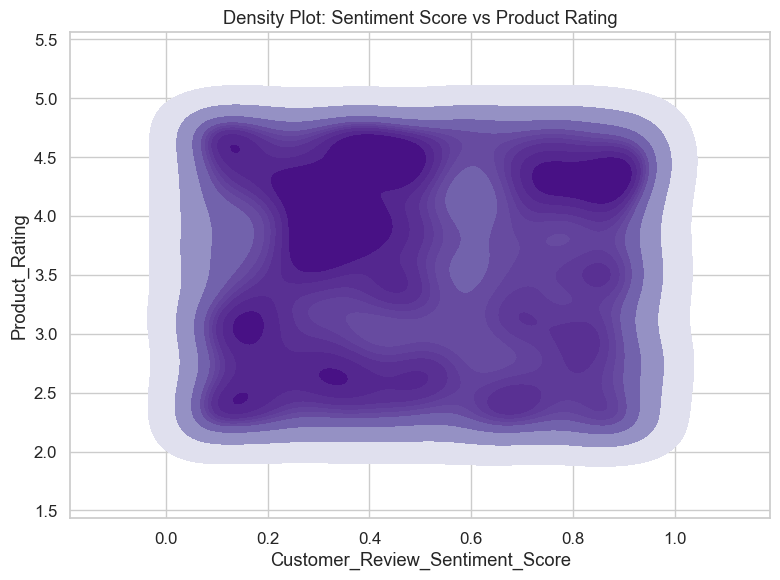

In [176]:
plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df_1,
    x="Customer_Review_Sentiment_Score", 
    y="Product_Rating", 
    cmap="Purples", fill=True
)
plt.title("Density Plot: Sentiment Score vs Product Rating")
plt.tight_layout()
plt.show()


### <i> Data Preprocessing </i>

In [177]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# 🔁 Step 1: Copy the main dataset
df_1 = df_1.copy()

# 🧹 Step 2: Drop useless columns
df_1.drop(columns=[ "Product_ID", "Similar_Product_List"], inplace=True)

# 🎯 Step 3: Create binary target variable: Recommended (1 if ≥ 0.5, else 0)
df_1['Recommended'] = (df_1['Probability_of_Recommendation'] >= 0.5).astype(int)
df_1.drop(columns=["Probability_of_Recommendation"], inplace=True)

# 🔍 Step 4: Handle missing values if any
df_1.fillna(method='ffill', inplace=True)

# 🔢 Step 5: Label Encoding for binary categorical column(s)
le = LabelEncoder()
df_1['Holiday'] = le.fit_transform(df_1['Holiday'])

# 🏷️ Step 6: One-hot encode multi-class categorical columns
df_1 = pd.get_dummies(df_1, columns=[
    'Category', 'Subcategory', 'Brand', 'Season', 'Geographical_Location'
], drop_first=True)

# 📏 Step 7: Scale numerical features using MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['Price', 'Average_Rating_of_Similar_Products', 
            'Product_Rating', 'Customer_Review_Sentiment_Score']

df_1[num_cols] = scaler.fit_transform(df_1[num_cols])

# 🧾 Step 8: Split features and target
X = df_1.drop('Recommended', axis=1)
y = df_1['Recommended']

# 📂 Step 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ Final Shapes
print("✅ Preprocessing Complete")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


✅ Preprocessing Complete
X_train shape: (8000, 43)
X_test shape : (2000, 43)
y_train shape: (8000,)
y_test shape : (2000,)


### <i> Modeling </i>
### <i> Logistic Regression </i>

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)

print("🔹 Logistic Regression Accuracy:", round(accuracy_log * 100, 2), "%")
print("🔹 Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 55.2 %
🔹 Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.35      0.03      0.05       876
           1       0.56      0.96      0.71      1124

    accuracy                           0.55      2000
   macro avg       0.46      0.49      0.38      2000
weighted avg       0.47      0.55      0.42      2000



### <i> Random Forest Classifier </i>

In [179]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("🌲 Random Forest Accuracy:", round(accuracy_rf * 100, 2), "%")
print("🌲 Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))


🌲 Random Forest Accuracy: 53.55 %
🌲 Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.45      0.29      0.35       876
           1       0.57      0.73      0.64      1124

    accuracy                           0.54      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.52      0.54      0.51      2000



### <i> SVC </i>

In [180]:
from sklearn.svm import SVC

# Initialize and train model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("⚙️ Support Vector Machine Accuracy:", round(accuracy_svm * 100, 2), "%")
print("⚙️ Classification Report (SVM):\n")
print(classification_report(y_test, y_pred_svm))


⚙️ Support Vector Machine Accuracy: 55.65 %
⚙️ Classification Report (SVM):

              precision    recall  f1-score   support

           0       0.47      0.11      0.17       876
           1       0.57      0.91      0.70      1124

    accuracy                           0.56      2000
   macro avg       0.52      0.51      0.43      2000
weighted avg       0.52      0.56      0.47      2000



### <i> Comparison OF MOdels </i>

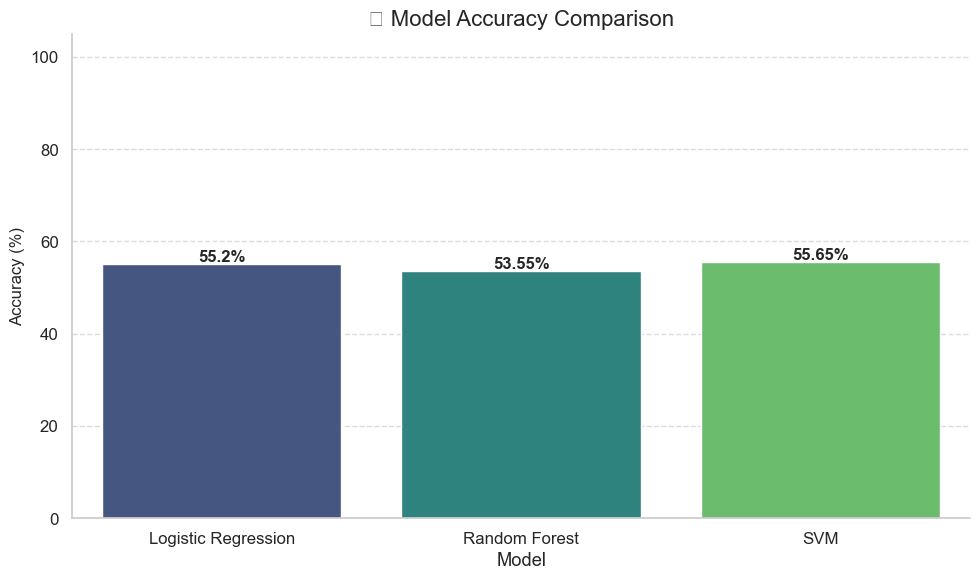

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their accuracy scores
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy_scores = [accuracy_log, accuracy_rf, accuracy_svm]

# Create a DataFrame for plotting
import pandas as pd
accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': [round(score * 100, 2) for score in accuracy_scores]
})

# 📊 Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis')

# Add labels on top of bars
for index, row in accuracy_df.iterrows():
    plt.text(index, row.Accuracy + 0.5, f"{row.Accuracy}%", ha='center', fontsize=12, weight='bold')

# Styling
plt.title("🔍 Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 105)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()
